In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

In [2]:
files = sorted(os.listdir('phd'))
for i, f in enumerate(files):
    print('%2.2d'%i, f)

00 .directory
01 N-00500K-0050p-0_000a-1_600_v0.dat
02 N-00500K-0170p-0_000a-1_600_v0.dat
03 N-01000K-0100p-0_000a-1_600_v0.dat
04 N-01000K-0340p-0_000a-1_600_v0.dat
05 N-01500K-0150p-0_000a-1_600_v0.dat
06 N-01500K-0510p-0_000a-1_600_v0.dat
07 N-02000K-0200p-0_000a-1_600_v0.dat
08 N-02000K-0680p-0_000a-1_600_v0.dat
09 N-02500K-0250p-0_000a-1_600_v0.dat
10 N-02500K-0850p-0_000a-1_600_v0.dat
11 N-03000K-0300p-0_000a-1_600_v0.dat
12 N-03000K-1020p-0_000a-1_600_v0.dat
13 N-03500K-0350p-0_000a-1_600_v0.dat
14 N-03500K-1190p-0_000a-1_600_v0.dat
15 N-04000K-0400p-0_000a-1_600_v0.dat
16 N-04000K-1360p-0_000a-1_600_v0.dat
17 batches-N-00500K-0050p-0_000a-1_000-3_500_v0.dat
18 batches-N-00500K-0170p-0_000a-1_000-3_500_v0.dat
19 batches-N-01000K-0100p-0_000a-1_000-3_500_v0.dat
20 batches-N-01000K-0340p-0_000a-1_000-3_500_v0.dat
21 batches-N-01500K-0150p-0_000a-1_000-3_500_v0.dat
22 batches-N-01500K-0510p-0_000a-1_000-3_500_v0.dat
23 batches-N-02000K-0200p-0_000a-1_000-3_500_v0.dat
24 batches-N-0

In [3]:
file = files[3]
data = np.loadtxt('phd/' + file, skiprows=2, delimiter=',')
N = int(file[file.find('N-') + 2 : file.find('K-')])
K = int(file[file.find('K-') + 2 : file.find('p-')])
with open('phd/' + file, 'r') as f:
    header = f.readline().split(',')
    print(header)
    BURN = int(re.sub(r'[^0-9]', '', header[-2]))
    a = float(re.sub(r'[^0-9\.]', '', header[3]))
print(file)
print('N=%d'%N, 'K=%d'%K)
print('BURN=%d'%BURN)

['N=1000', 'k=100', 'p=0.000000', 'a=1.600000', 'BURN=34538', 'ITERS=34538\n']
N-01000K-0100p-0_000a-1_600_v0.dat
N=1000 K=100
BURN=34538


In [4]:
r2 = data[:,0]
N0 = data[:,1]
N1 = data[:,2]
t = data[:,3]
dt = data[:,4]

crossings: 10
Measured frequency: 0.1432


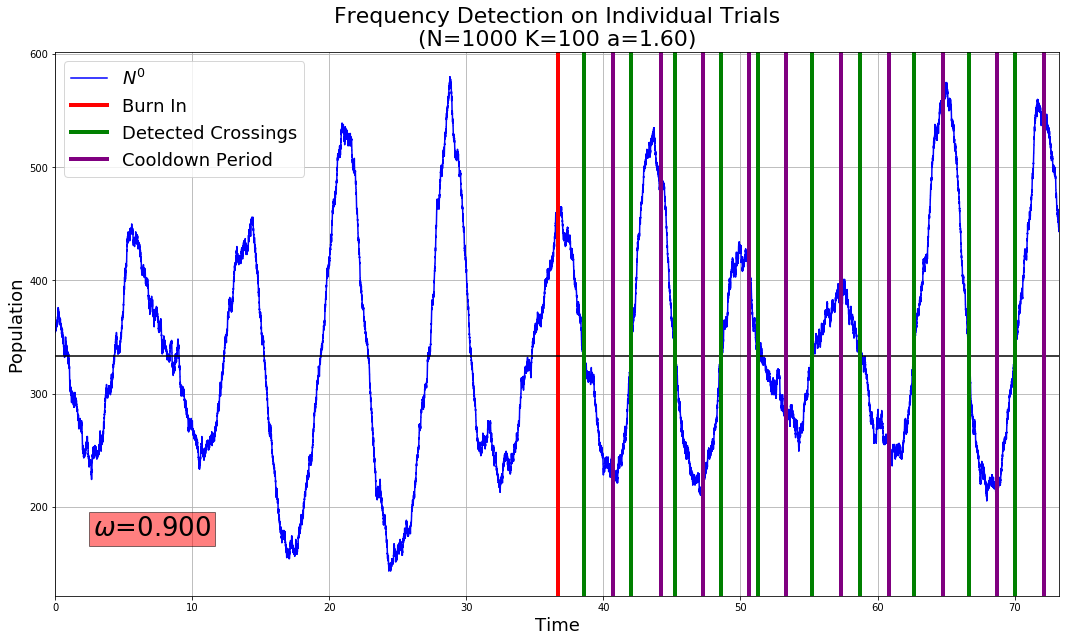

In [9]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

ax.plot(t, N0, label='$N^0$', color='blue')
ax.axvline(t[BURN], lw=4, color='red', label='Burn In')
ax.axhline(N/3, color='k')
ax.set_xlim(0, t[-1])
ax.grid()
ax.set_ylabel('Population', fontsize=18)
ax.set_xlabel('Time', fontsize=18)
ax.set_title('Frequency Detection on Individual Trials\n(N=%d K=%d a=%.2f)'%(N,K,a), fontsize=22)

t_start = 0
t_end = 0
started = False
cooldown = int(N * 2.00)
cd_started = False
crossings = 0
counter = 0
has_label = False

yprev = N0[BURN-1] - N/3
for i in range(BURN, len(t)):
    y = N0[i] - N/3
    if np.sign(yprev) != np.sign(y) and not cd_started:
        if not started:
            t_start = t[i]
            started = True
        t_end = t[i]
        cd_started = True
        crossings += 1
        
        if not has_label:
            has_label = True
            ax.axvline(t[i], color='green', label='Detected Crossings', lw=4)
            ax.axvline(t[i+cooldown], color='purple', label='Cooldown Period', lw=4)
        else:
            ax.axvline(t[i], color='green', lw=4)
            ax.axvline(t[i+cooldown], color='purple', lw=4)
    if cd_started:
        counter += 1
    if counter > cooldown:
        cd_started = False
        counter = 0
    yprev = y
    
print('crossings:', crossings)
freq = (crossings - 1) / 2 / (t_end - t_start)
print("Measured frequency: %.4f" % freq)
omega = 2*np.pi*freq

plt.legend(loc='upper left', fontsize=18)
inv = ax.transData.inverted()
plt.text(*inv.transform((200,150)), '$\omega$=%.3f'%omega, bbox=dict(fc='red', alpha=0.5), fontsize=26)
plt.show()
#plt.savefig('foooo.png')